In [1]:
loc=((19.0760,72.8777))
dis=2000

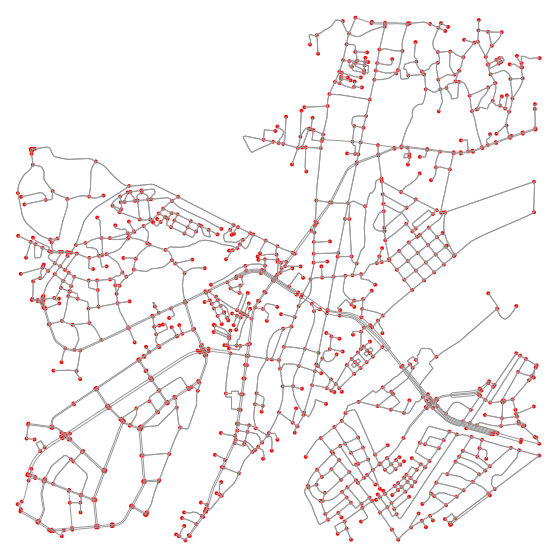

[1030, 918, 369, 1086, 61, 899, 869, 455, 53, 92, 597, 640, 214, 1013, 311, 763, 932, 970, 503, 118, 338, 145, 452, 875, 578, 481, 467, 26, 1066, 813, 1076, 377, 744, 972, 773, 580, 607, 237, 29, 783, 640, 509, 931, 1039, 424, 453, 100, 892, 338, 311]
[3129, 2084, 36888, 3085, 18754, 39879, 22190, 15673, 1817, 32302, 33251, 16975, 32290, 13497, 9622, 15028, 16258, 13286, 34241, 18807, 38436, 38913, 34902, 10783, 26661, 21279, 31372, 12180, 24209, 19658, 4709, 12744, 24003, 21547, 13331, 39580, 19290, 11120, 31228, 22282, 16447, 29072, 30357, 2424, 11267, 8290, 36594, 14490, 23402, 9254]


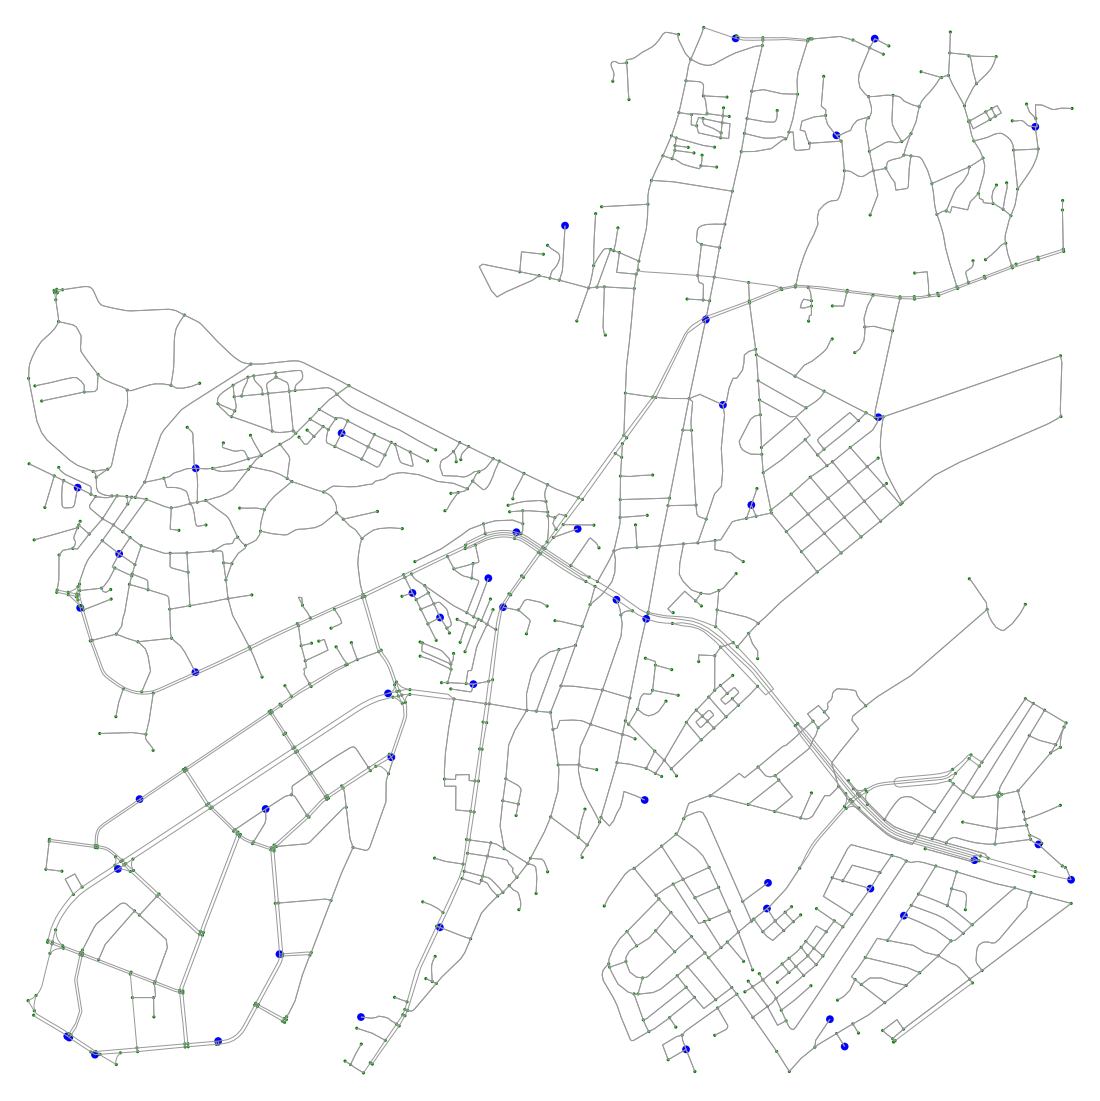

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import folium

graph=ox.graph_from_point(loc, distance=dis,network_type='drive')
ox.plot_graph(graph,node_color='r', fig_height=10, fig_width=10)
graph_proj = ox.project_graph(graph)
nodes, edges = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
node,edge=ox.graph_to_gdfs(graph, nodes=True, edges=True)
#print(nodes.head())
#print(type(nodes))
B=pd.Series.tolist(nodes.osmid)
C=pd.Series.tolist(nodes.y)
D=pd.Series.tolist(nodes.x)
C1=pd.Series.tolist(node.y)
D1=pd.Series.tolist(node.x)
#print(C1)
#print(len(B))
#print(B)

A = nx.adjacency_matrix(graph,weight='length')
#print(len(graph))
#print(A)
#print(type(A))
#print(type(A.todense()))
np.savetxt("foo.csv", A.todense(), delimiter=",")
Ac=A.tocoo()
#print(type(Ac))

#print(type(Ac.data))

list_cs=[]
for count in range(0,50):
    list_cs.append(random.randrange(0,len(graph)));
print(list_cs)

list_cs_wt=[]
for count in range(0,50):
    list_cs_wt.append(random.randrange(0,40000));
print(list_cs_wt)

my_file = open('graph.txt', 'w+')

for i in range (0,50):
     my_file.write("%d " %list_cs[i])  
     my_file.write("%d \n" %list_cs_wt[i]) 
    
nc=['g' for node in B]
ns=[10 for node in B]
for i in list_cs:
    nc[i]='b'
    ns[i]=60
ox.plot_graph(graph,node_color=nc,node_size=ns,fig_height=20, fig_width=20)    

m1 = ox.plot_graph_folium(graph,edge_width=1)
for j in range (0,len(graph)):
    k=j
    o=(C1[k],D1[k])
    #print(o)
    folium.Marker(location=o,popup=k,icon=folium.Icon(color='black'), tooltip='Click Me!').add_to(m1)
for j in range (0,len(list_cs)):
    k=list_cs[j]
    o=(C1[k],D1[k])
    #print(o)
    folium.Marker(location=o,popup=k,icon=folium.Icon(color='red'), tooltip='Click Me!').add_to(m1)
ja='0';
ja+=".html"
m1.save(ja)   

list1=Ac.data
list2=Ac.row
list3=Ac.col

my_file.write("%s \n" %len(list1))
for i in range(len(list1)):
    my_file.write("%d " %list2[i])  
    my_file.write("%d " %list3[i])  
    my_file.write("%d \n" %list1[i]) 

my_file.close()

In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

my_file = open('input.txt', 'w+')
a=int(input("Enter source: "))
b=int(input("Enter destination: "))
my_file.write("%d " %a);
my_file.write("%d \n" %b);
my_file.write("\n")
c=int(input("Enter number of unavailable nodes: "))
print("Enter details of nodes: ")
my_file.write("%d \n" %c)
for i in range (0,c):
    a=int(input())
    my_file.write("%d " %a)
my_file.write("\n")
d=int(input("Available Charge: "))
e=int(input("Full charge Capacity: "))
my_file.write("%d " %d)
my_file.write("%d \n" %e)
my_file.close()

Enter source: 115
Enter destination: 783
Enter number of unavailable nodes: 0
Enter details of nodes: 
Available Charge: 10
Full charge Capacity: 25000


In [3]:
data = data2 = "" 

with open('graph.txt') as fp: 
    data = fp.read() 

with open('input.txt') as fp: 
    data2 = fp.read() 

data += "\n"
data += data2 
  
with open ('final_input.txt','w') as fp: 
    fp.write(data) 
fp.close()

In [5]:
with open('final_input.txt','r') as f:
    print(f.read())

1030 3129 
918 2084 
369 36888 
1086 3085 
61 18754 
899 39879 
869 22190 
455 15673 
53 1817 
92 32302 
597 33251 
640 16975 
214 32290 
1013 13497 
311 9622 
763 15028 
932 16258 
970 13286 
503 34241 
118 18807 
338 38436 
145 38913 
452 34902 
875 10783 
578 26661 
481 21279 
467 31372 
26 12180 
1066 24209 
813 19658 
1076 4709 
377 12744 
744 24003 
972 21547 
773 13331 
580 39580 
607 19290 
237 11120 
29 31228 
783 22282 
640 16447 
509 29072 
931 30357 
1039 2424 
424 11267 
453 8290 
100 36594 
892 14490 
338 23402 
311 9254 
2595 
0 183 27 
1 778 84 
1 894 7 
2 3 26 
2 528 105 
3 308 25 
3 485 10 
4 5 295 
4 300 128 
4 893 16 
5 6 182 
5 372 161 
5 664 14 
6 8 378 
6 372 105 
6 606 12 
7 183 95 
7 365 34 
7 1094 41 
8 9 174 
8 814 60 
9 11 129 
9 1047 8 
9 1049 69 
10 205 54 
10 487 6 
11 13 58 
11 891 6 
12 254 47 
12 647 7 
12 838 287 
13 651 7 
13 755 503 
13 980 197 
14 20 28 
14 365 62 
14 848 41 
15 17 17 
15 246 89 
15 393 7 
16 37 118 
16 83 31 
16 124 61 
17 302 87 

In [6]:
!g++ main_algo.cpp -o run

In [4]:
!run<final_input.txt

In [6]:
with open('output.txt','r') as f:
    print(f.read())

115 783
115 747 728 216 733 470 615 888 352 633 836 181 182 -453 211 3 308 335 332 4 5 6 8 9 11 13 755 781 783
115 747 728 216 733 470 615 888 352 633 836 180 311 767 314 417 -1076 417 768 326 408 406 405 403 399 832 1 778 2 3 308 335 332 4 5 6 8 9 11 13 755 781 783



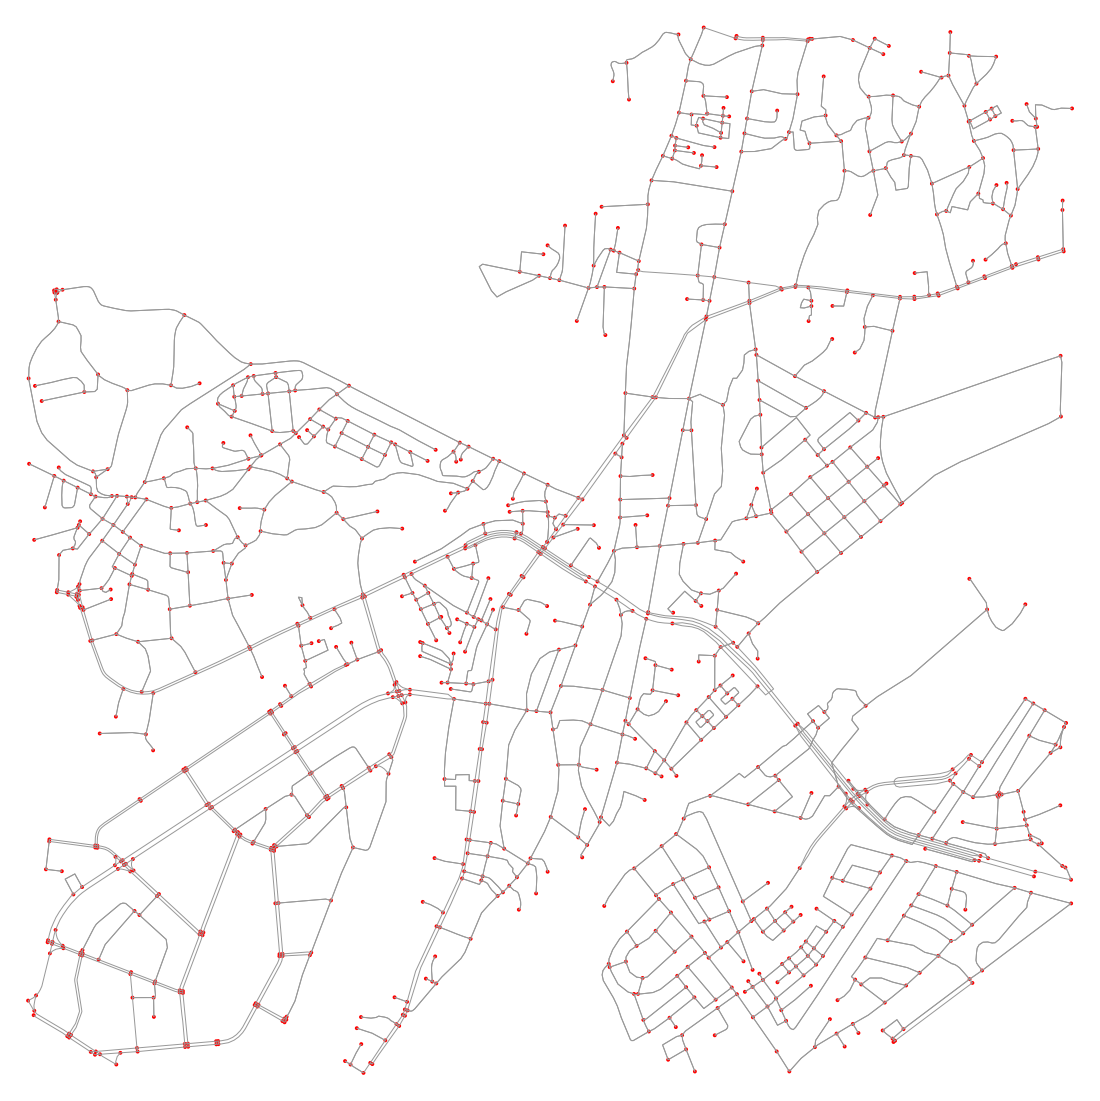

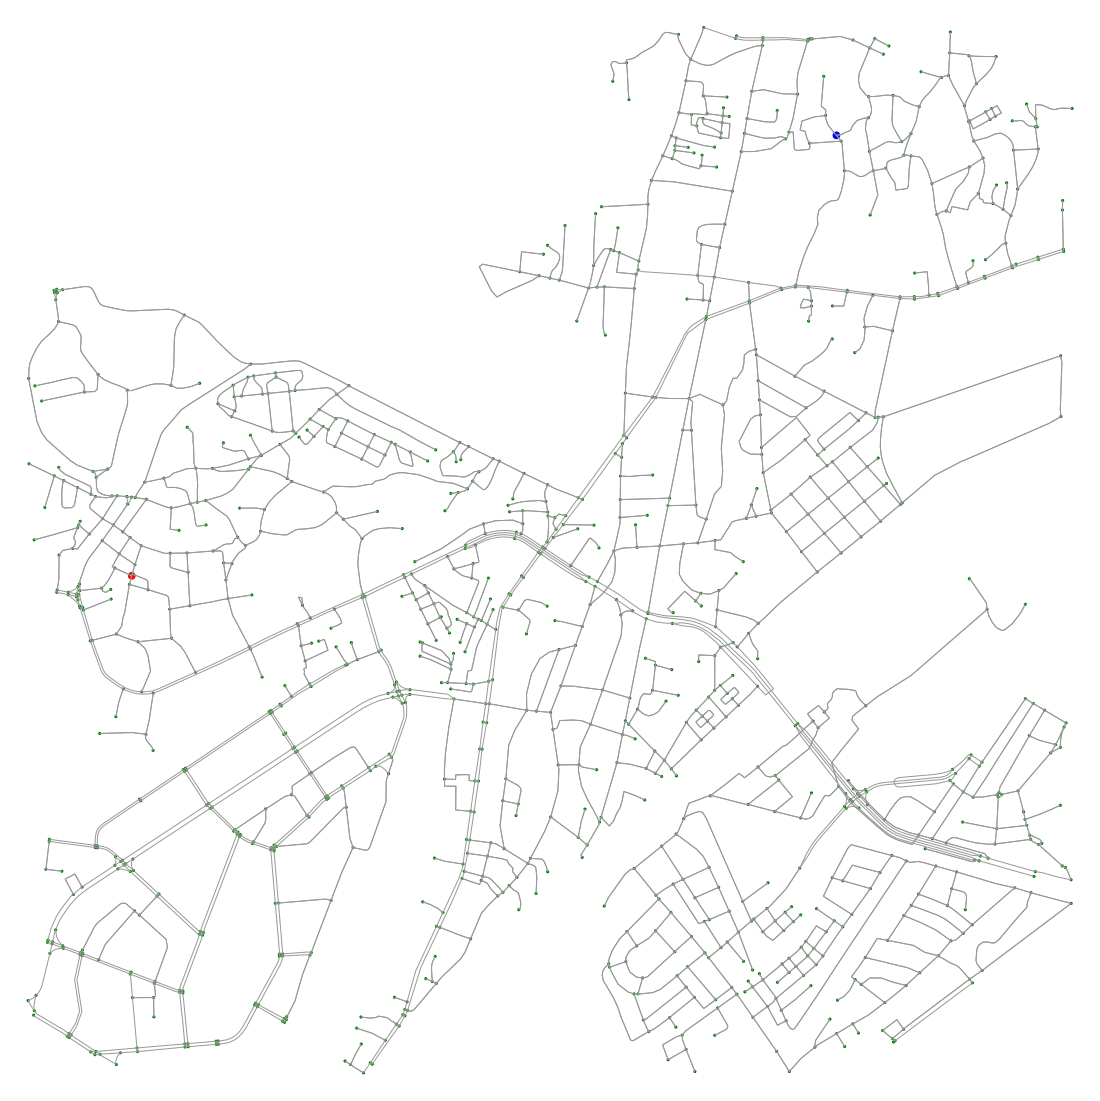

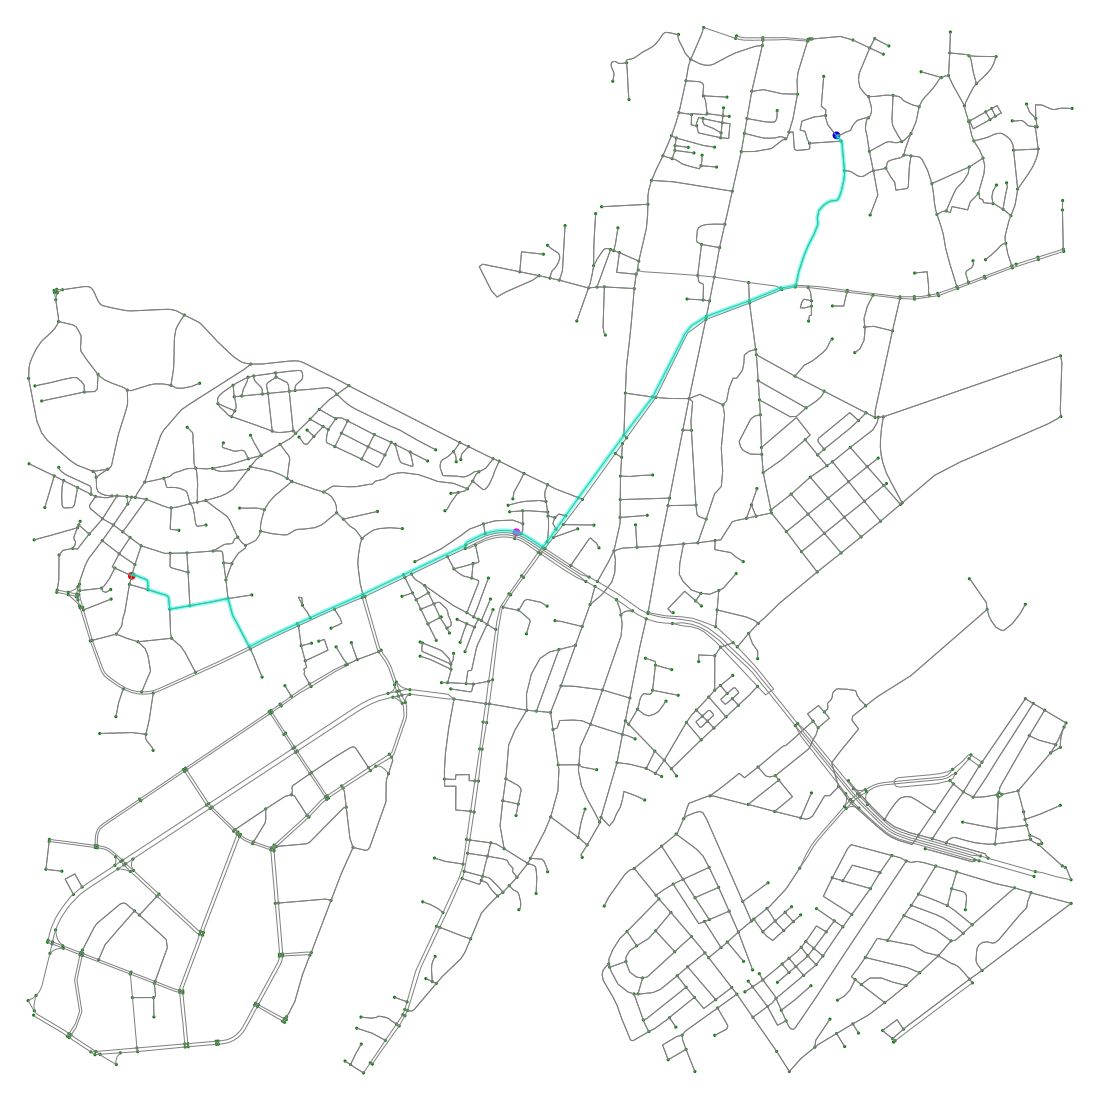

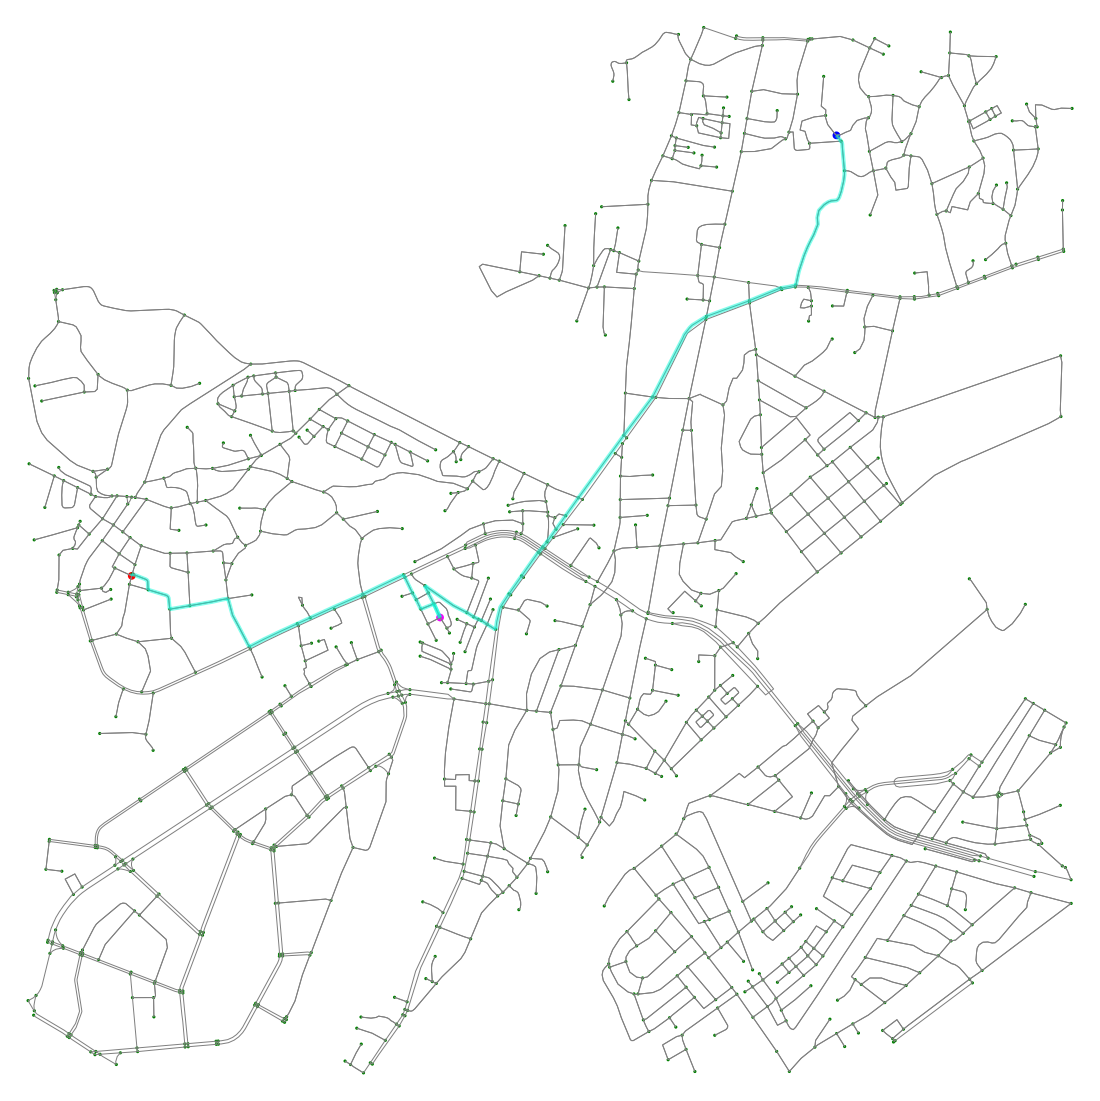

In [7]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium

#graph=ox.graph_from_point((19.0760,72.8777), distance=500,network_type='drive')


graph=ox.graph_from_point((19.0760,72.8777), distance=2000,network_type='drive')
ox.plot_graph(graph,node_color='r', fig_height=20, fig_width=20)
graph_proj = ox.project_graph(graph)
nodes, edges = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)
node,edge=ox.graph_to_gdfs(graph, nodes=True, edges=True)
#print(nodes.head())
#print(type(nodes))
B=pd.Series.tolist(nodes.osmid)
C1=pd.Series.tolist(node.y)
D1=pd.Series.tolist(node.x)
#print(len(graph))
#print(B)

file=open('output.txt','r+')
file2=open('output2.txt','r+')
file3=open('output3.txt','r+');
Lines = file.readlines() 
lis=[]
count = 0
for line in Lines:
    lis.append(line.strip()) 

Lines2=file2.readlines()
lis2=[]

for line in Lines2:
    lis2.append(line.strip())
    
Lines3=file3.readlines()
lis3=[]
for line in Lines3:
    lis3.append(line.strip())
    


#print(lis2)

l1=lis[0].split(" ")
nc=['r' if (node==B[int(l1[0])])  else 'b' if (node==B[int(l1[len(l1)-1])]) else 'g' for node in B]
ns=[60 if (node==B[int(l1[0])] or node==B[int(l1[len(l1)-1])]) else 10 for node in B]
ox.plot_graph(graph,node_color=nc,node_size=ns,fig_height=20, fig_width=20)

for i in range (1,len(lis)):
    l1=lis[i].split(" ")
    route=[]
    cs=[]
    for j in l1:
        if int(j)<0:
            cs.append(-int(j))
            route.append(B[-int(j)])
        else:
            route.append(B[int(j)])
    #print(route)
    #print(cs)
    nc=['r' if (node==route[0])  else 'b' if (node==route[len(route)-1]) else 'g' for node in B]
    for j in cs:
        nc[j]='#F004FB'
    ns=[60 if (node==route[0] or node==route[len(route)-1]) else 10 for node in B]
    for j in cs:
        ns[j]=60
    fig, ax = ox.plot_graph_route(graph, route, fig_height=20, 
                                  fig_width=20, 
                                  show=False, close=False, 
                                  edge_color='grey',
                                  orig_dest_node_alpha=0,
                                  route_color='#04FBD8',
                                  node_color=nc,node_size=ns)
    tmplis=lis2[i-1].split(" ")
    tmplis2=lis3[i-1].split(" ")
    m1 = ox.plot_route_folium(graph, route, route_color='blue')
    for j in range (0,len(route)):
        b=route[j]
        if b in B:
            a=B.index(b)
            k=str(a)
            o=(C1[a],D1[a])
            #print(o)
            folium.Marker(location=o,popup=k,icon=folium.Icon(color='black'), tooltip='Click Me!').add_to(m1)
    
    b=route[0]
    a=B.index(b)
    k=str(a)
    o=(C1[a],D1[a])
    #print(o)
    folium.Marker(location=o,popup=k,icon=folium.Icon(color='blue'), tooltip='Click Me!').add_to(m1)
    
    b=route[len(route)-1]
    a=B.index(b)
    k=str(a)
    k+='\n Travel time : '
    k+=str(tmplis2[0])
    k+='hrs \n'
    k+='\n Total dist : '
    k+=str(tmplis2[1])
    k+='M \n'
    o=(C1[a],D1[a])
    #print(o)
    folium.Marker(location=o,popup=k,icon=folium.Icon(color='green'), tooltip='Click Me!').add_to(m1)
    
    for j in range (0,len(cs)):
        k=cs[j]
        k1=str(cs[j])
        k1+='\n Minimum Charging : '
        k1+=str(tmplis[j])
        o=(C1[k],D1[k])
        #print(o)
        folium.Marker(location=o,popup=k1,icon=folium.Icon(color='red'), tooltip='Click Me!').add_to(m1)
    ja=str(i);
    ja+=".html"
    m1.save(ja)